In [2]:
from kervis.utils import Model
from kervis.utils import Dataset
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

# Initialize a customized dataset

In [4]:
example = Dataset("example",cmap="Set3", from_TUDataset=False)
example.data = example.data + example.data
example.graphs = example.graphs + example.graphs
example.y = [y for i in range(len(example.y)) for y in example.y]

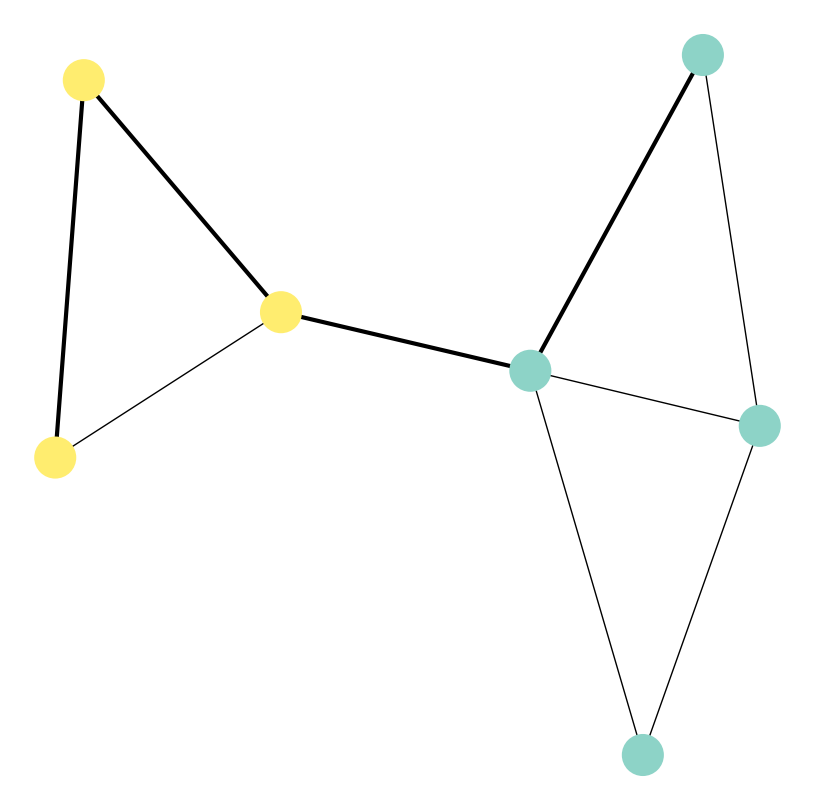

In [7]:
example.plot_graph(0, node_size=200)

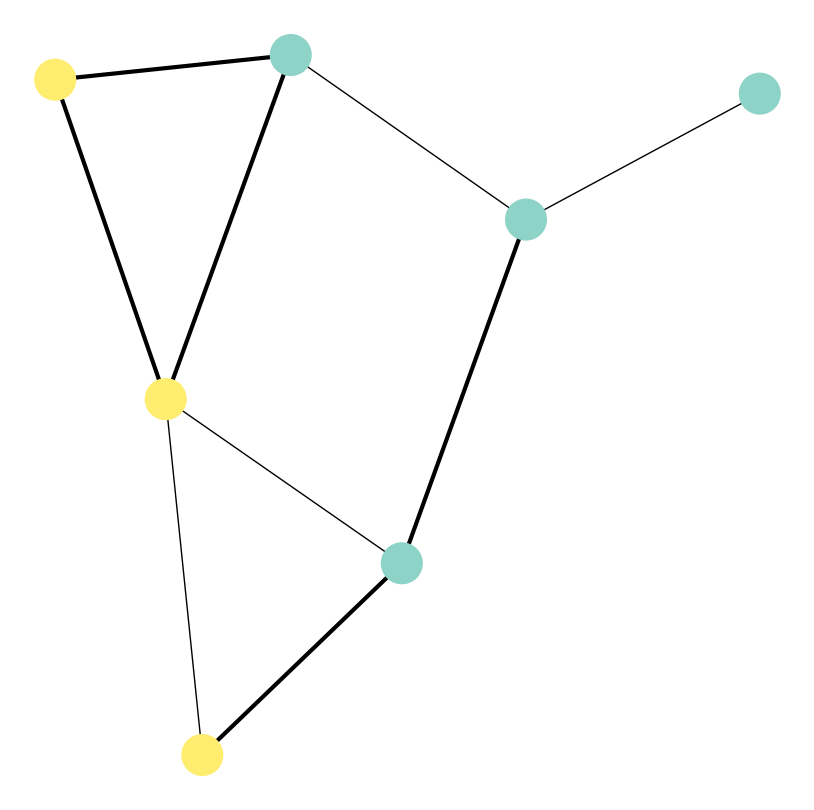

In [58]:
example.plot_graph(1, node_size=200)

In [59]:
# get the color map of the graphs
example.node_color_map

{0: (0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0),
 1: (1.0, 0.9294117647058824, 0.43529411764705883, 1.0)}

In [5]:
# initialize the kernels
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GL = Graphlet(k=3, connected=False)
WL = WeisfeilerLehman(n_iter=1)

In [6]:
VH_example = Model(VH, example, "svm", test_size=0.5)
EH_example = Model(EH, example, "svm", test_size=0.5)
SP_example = Model(SP, example, "svm", test_size=0.5)
GL_example = Model(GL, example, "svm", test_size=0.5)
WL_example = Model(WL, example, "svm", test_size=0.5)

## Vertex histogram

In [62]:
# feature vectors of VH
print(VH_example.kernel.attributes)
print(VH_example.kernel.X[0])
print(VH_example.kernel.X[1])

[0, 1]
[4. 3.]
[4. 3.]


## Edge histogram

In [63]:
# feature vectors of EH
print(EH_example.kernel.attributes)
print(EH_example.kernel.X[0])
print(EH_example.kernel.X[1])

[0, 1]
[5. 4.]
[4. 5.]


## Graphlet

In [7]:
# feature vectors of GL
print(GL_example.kernel.attributes)
print(GL_example.kernel.X[0])
print(GL_example.kernel.X[1])

# inner product of the feature vectors
print(sum(a*b for a,b in zip(GL_example.kernel.X[0], GL_example.kernel.X[1])))

[0, 1, 2, 3]
[ 3. 22.  7.  3.]
[ 5. 17. 11.  2.]
472.0


In [69]:
# to exlain the prediction and highlight the features
GL_example.explain()

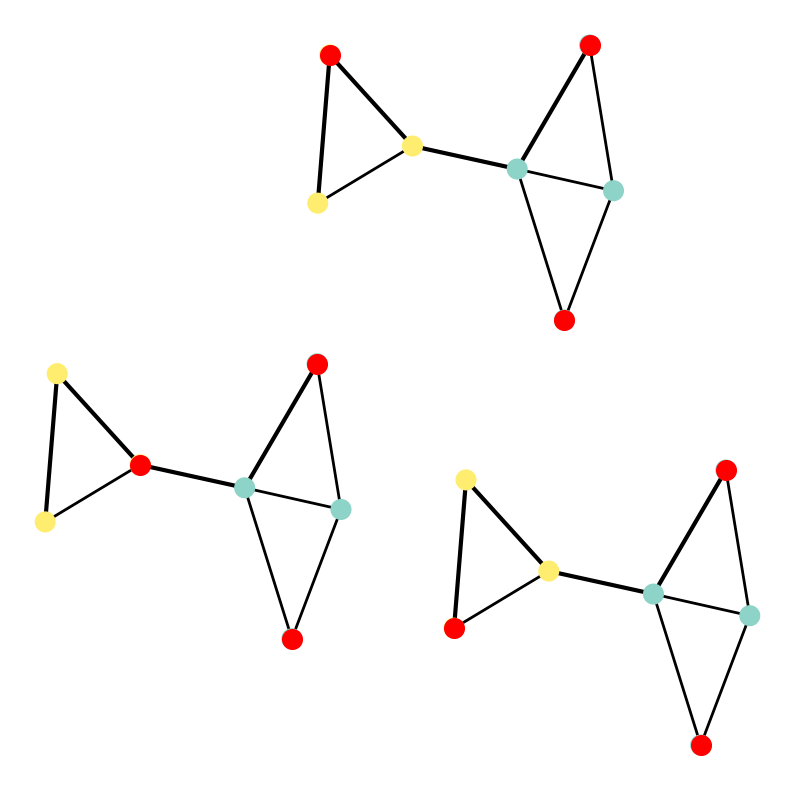

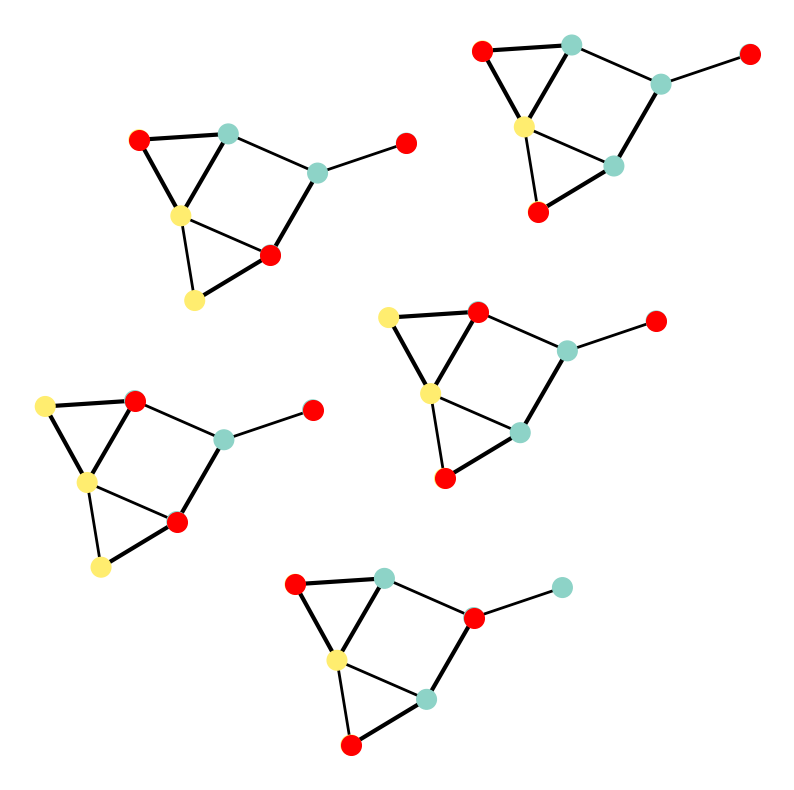

In [11]:
GL_example.highlight_features(0, 0, node_size=200)
GL_example.highlight_features(1, 0, node_size=200)

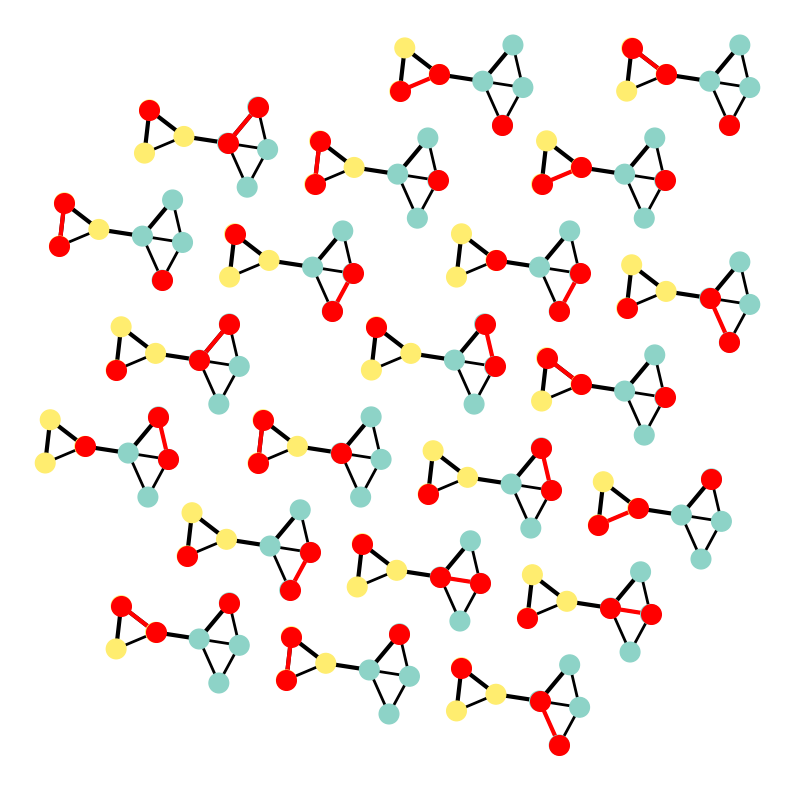

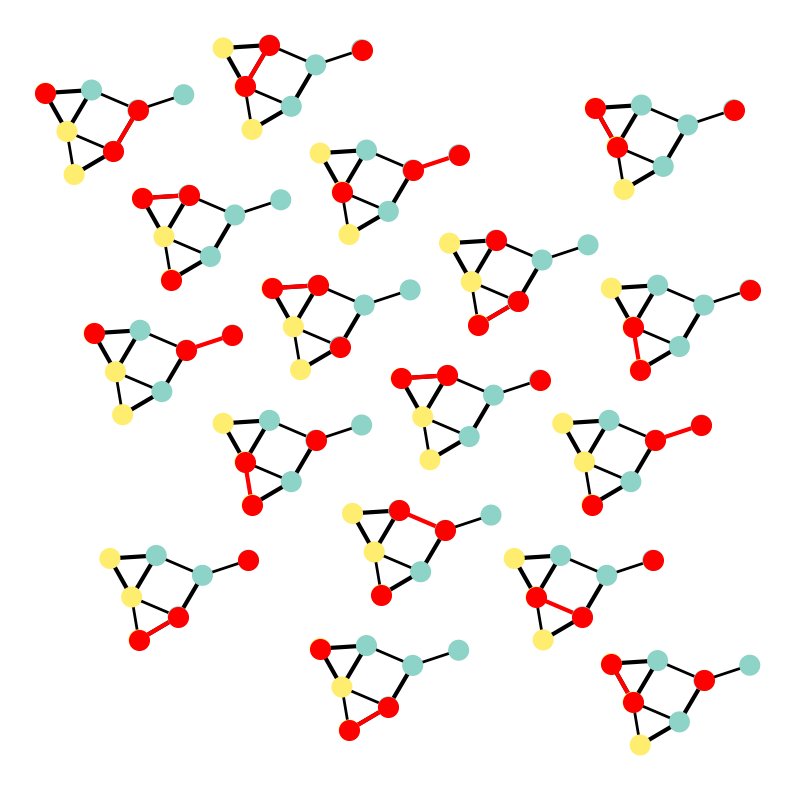

In [12]:
GL_example.highlight_features(0, 1, node_size=200)
GL_example.highlight_features(1, 1, node_size=200)

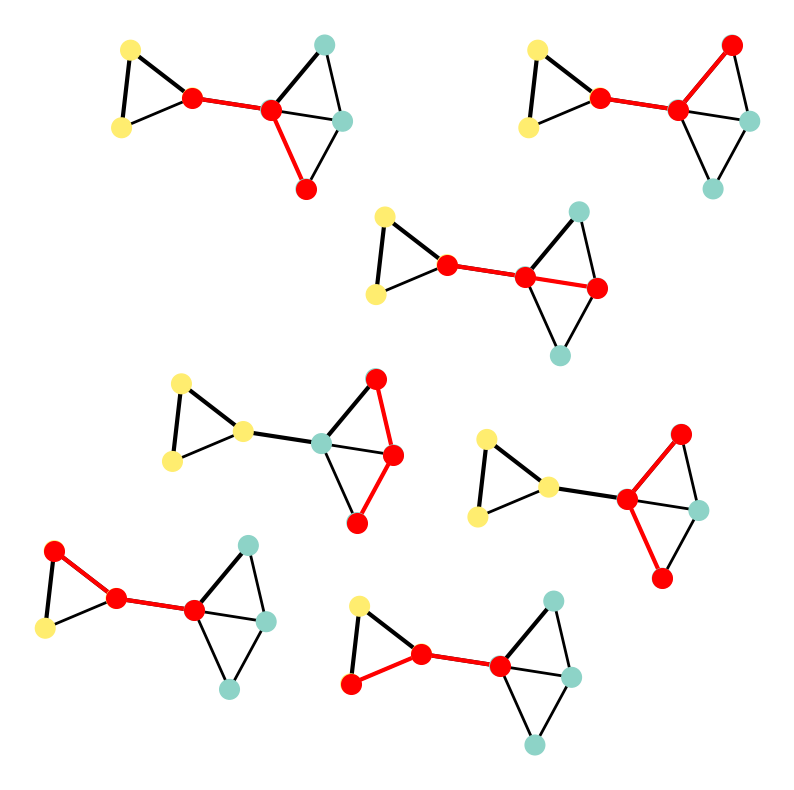

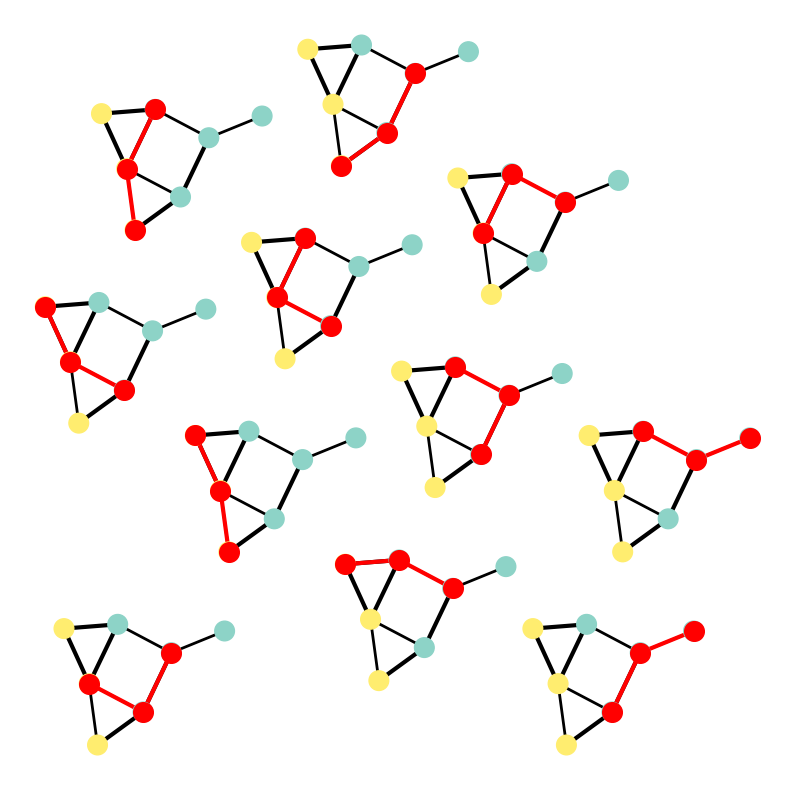

In [13]:
GL_example.highlight_features(0, 2, node_size=200)
GL_example.highlight_features(1, 2, node_size=200)

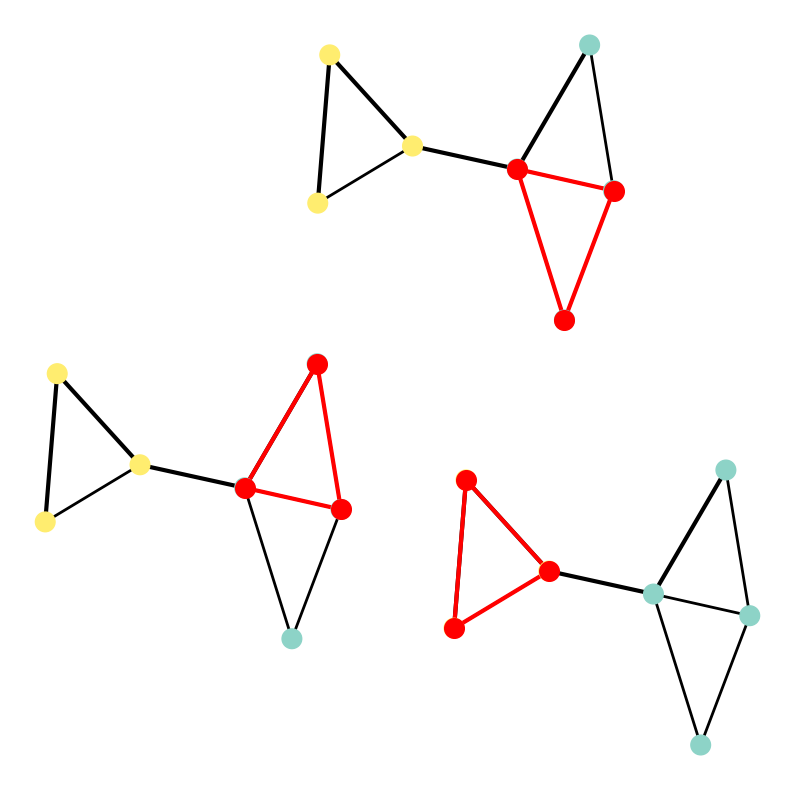

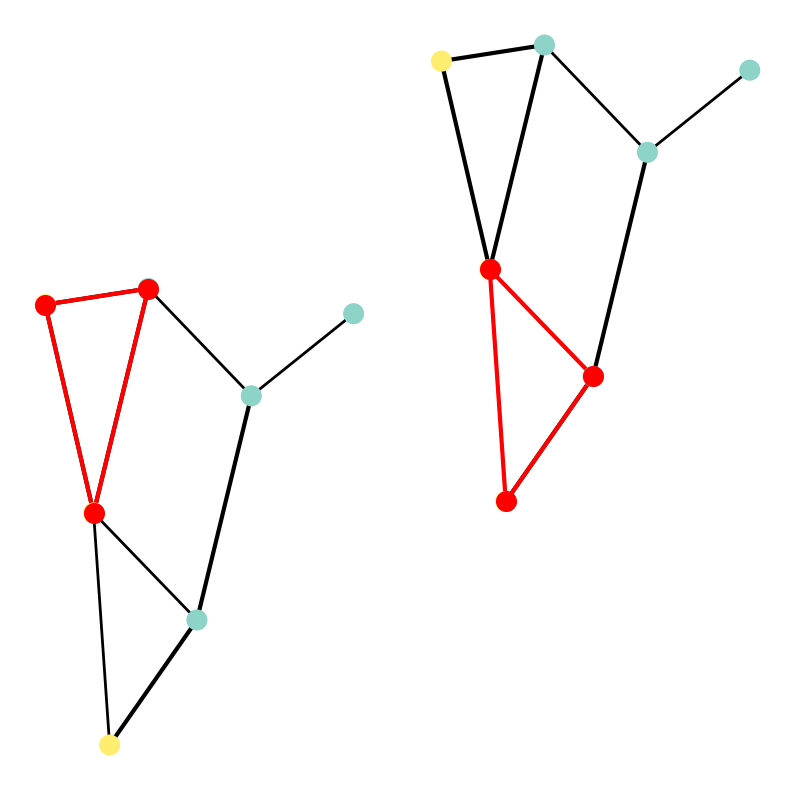

In [14]:
GL_example.highlight_features(0, 3, node_size=200)
GL_example.highlight_features(1, 3, node_size=200)

## Shortest path

In [15]:
# feature vectors of SP
print(SP_example.kernel.attributes)
print(SP_example.kernel.X[0])
print(SP_example.kernel.X[1])

# inner product of the feature vectors
print(sum(a*b for a,b in zip(SP_example.kernel.X[0], SP_example.kernel.X[1])))

[(0, 1, 3), (1, 1, 2), (0, 0, 2), (0, 1, 2), (0, 0, 1), (1, 1, 1), (0, 1, 1)]
[6. 0. 2. 5. 5. 3. 1.]
[4. 1. 4. 6. 3. 2. 4.]
87.0


## Weisfeiler-Lehman

In [5]:
# iteration 0
print(WL_example.kernel.iter_subtree_list[0][0])
print(WL_example.kernel.iter_subtree_list[0][1])

# # iteration 1
print(WL_example.kernel.iter_subtree_list[1][0])
print(WL_example.kernel.iter_subtree_list[1][1])

# feature vectors of WL
print(WL_example.kernel.attributes)
print(WL_example.kernel.X[0])
print(WL_example.kernel.X[1])

# inner product of the feature vectors
print(sum(a*b for a,b in zip(WL_example.kernel.X[0], WL_example.kernel.X[1])))

{0: 4.0, 1: 3.0}
{0: 4.0, 1: 3.0}
{'0,[0, 0]': 2, '0,[0, 0, 0]': 1, '0,[0, 0, 0, 1]': 1, '1,[0, 1, 1]': 1, '1,[1, 1]': 2}
{'1,[0, 1]': 2, '0,[0, 1, 1]': 2, '0,[0, 0, 0]': 1, '1,[0, 0, 1, 1]': 1, '0,[0]': 1}
[0, 1, '0,[0, 0, 0, 1]', '0,[0, 0, 0]', '0,[0, 0]', '0,[0, 1, 1]', '0,[0]', '1,[0, 0, 1, 1]', '1,[0, 1, 1]', '1,[0, 1]', '1,[1, 1]']
[4. 3. 1. 1. 2. 0. 0. 0. 1. 0. 2.]
[4. 3. 0. 1. 0. 2. 1. 1. 0. 2. 0.]
26.0


## For SHAP in Methodology

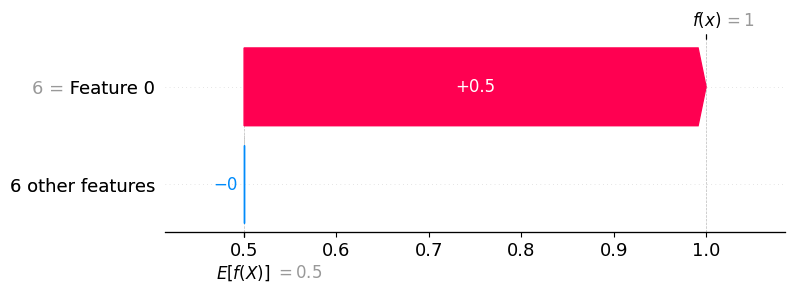

In [ ]:
SP_example.waterfall_plot(0, max_display=2)

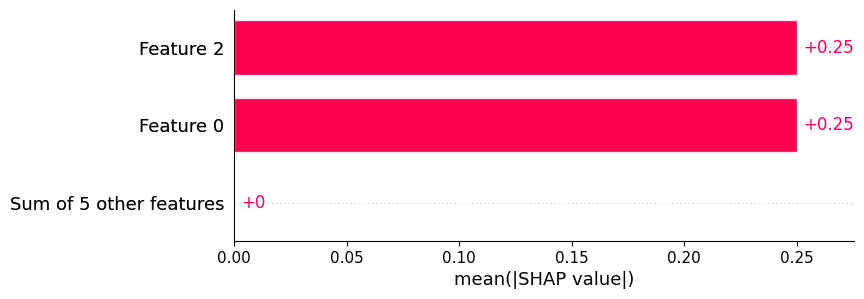

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


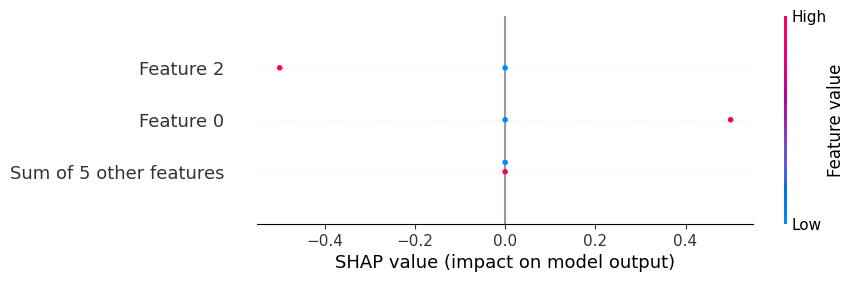

In [ ]:
SP_example.bar_plot(max_display=3)
SP_example.summary_plot(max_display=3)

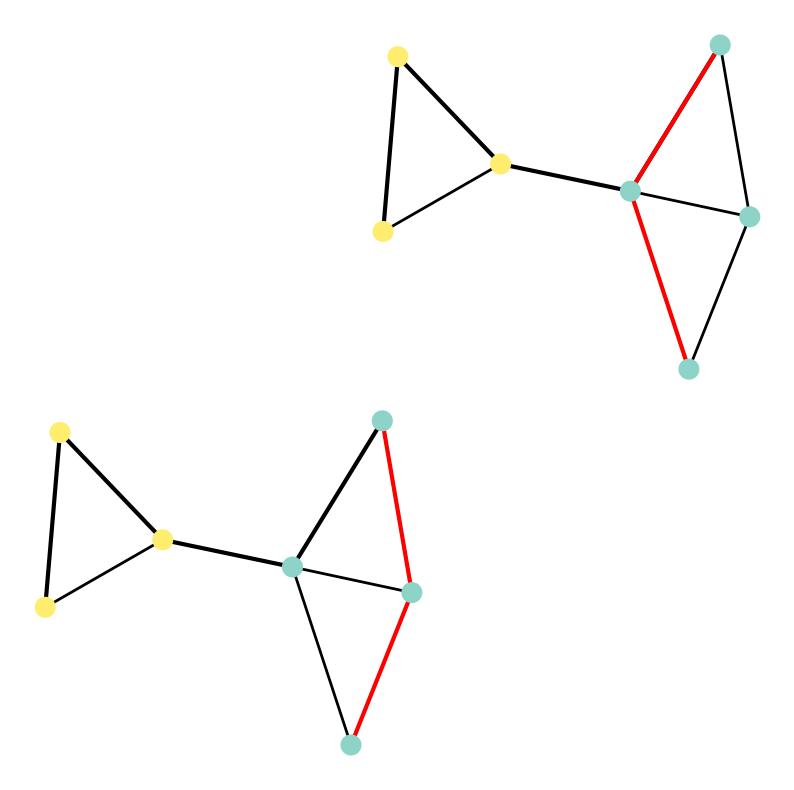

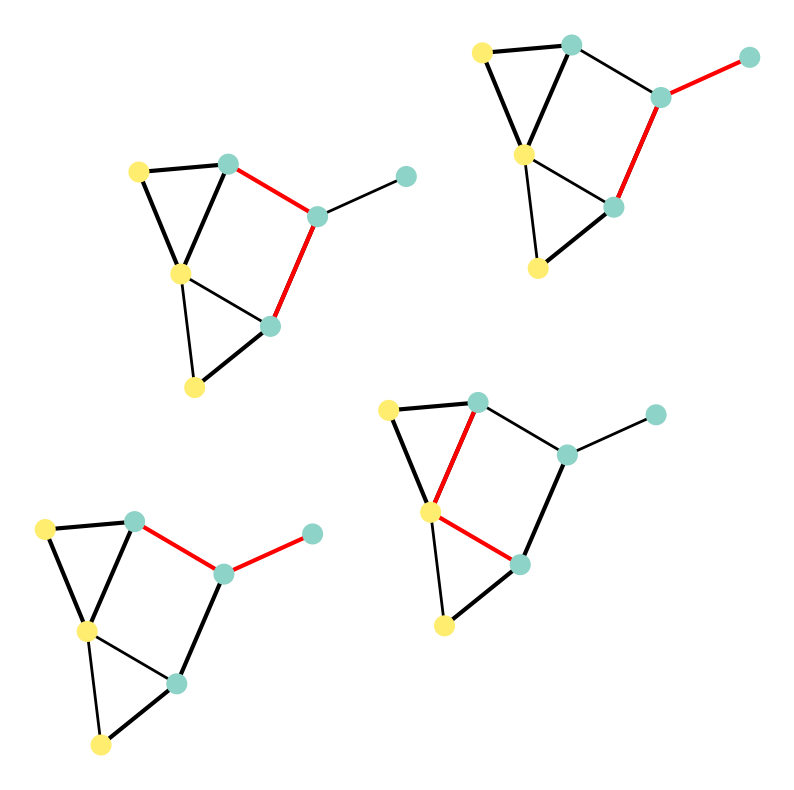

In [ ]:
SP_example.highlight_features(0,2, node_size=200)
SP_example.highlight_features(1,2, node_size=200)

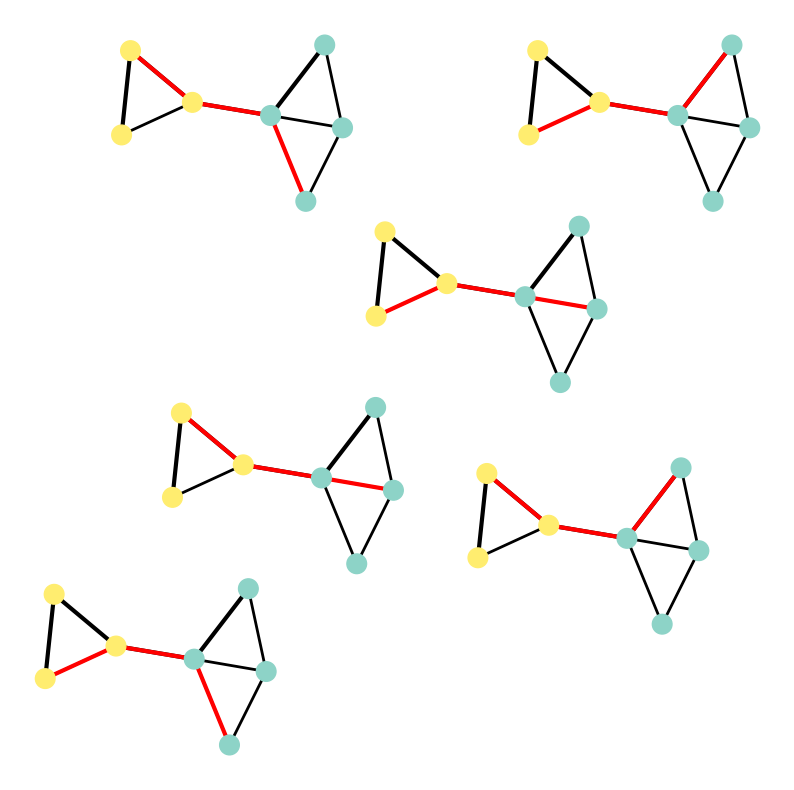

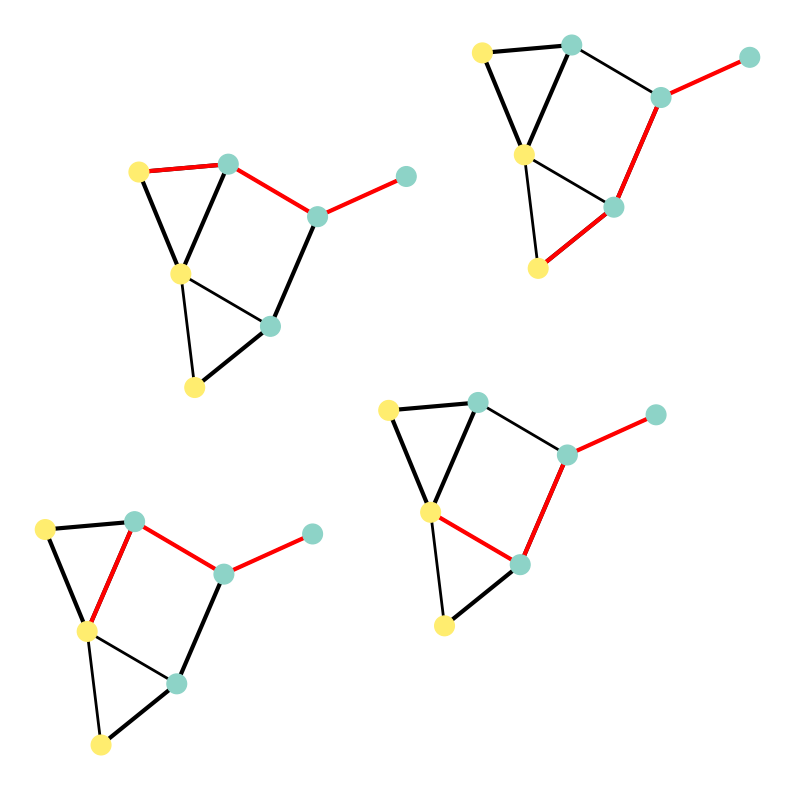

In [ ]:
SP_example.highlight_features(0,0, node_size=200)
SP_example.highlight_features(1,0, node_size=200)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [20]:
# generating linearly separable data
np.random.seed(42)
class_1 = np.random.randn(5, 2) + np.array([2, 2])
class_2 = np.random.randn(5, 2) + np.array([-2, -2])
X = np.vstack([class_1, class_2])
y = np.array([1] * 5 + [-1] * 5)

# fitting the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

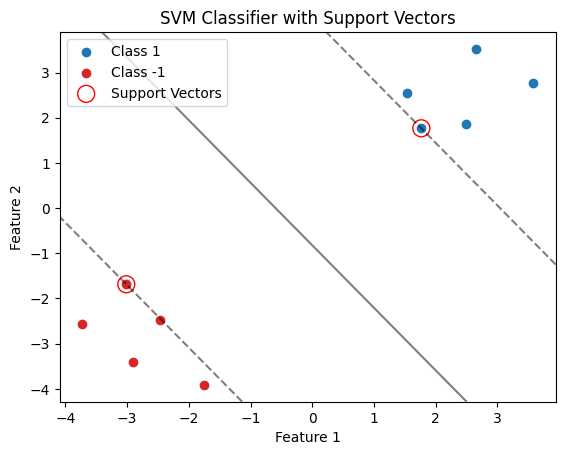

In [21]:
# get the support vectors and their indices
support_vectors = clf.support_vectors_
support_vector_indices = np.where(np.isin(X, support_vectors).all(axis=1))[0]

# plotting the data and decision boundary
plt.scatter(class_1[:, 0], class_1[:, 1], c='tab:blue', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], c='tab:red', label='Class -1')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='r', label='Support Vectors')

# plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier with Support Vectors')
plt.legend()
plt.show()